# <font color="red"> Bank Marketing Campaign

##### About Dataset
* Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

* **age**: The age of the person 
* **job**: type of job of the person
* **marital**: marital status of the person
* **education**: educational qualification of the person
* **default**: true if the person is a credit defaulter, otherwise false
* **balance**: bank balance of the person
* **housing**: true if the person is having a housing loan, otherwise false
* **loan**: true if the person is having a personal loan, otherwise false
* **contact**: communication type with the person
* **day**: last contact day of the month
* **month**: the last month of communication
* **duration**: last contact duration in seconds
* **campaign**: number of contacts during this campaign with the person
* **pdays**: number of days that passed by after the last communication
* **previous**: number of contacts performed before this campaign
* **poutcome**: outcome of the campaign
* **deposit**: has the person subscribed to the term deposit

* As the marketing campaign is based on the marketing of a term deposit, the deposit column is the target variable. Analyze this marketing campaign to find relationships among the people who subscribed to the term deposit.

In [1]:
import pandas as pd
import numpy as np


pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split

#for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score

import xgboost as xgb

# for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering #it separates data into clusters using the hierarchical clustering solution
from yellowbrick.cluster import KElbowVisualizer #a visualization tool used to determine the optimal number of clusters in a clustering algorithm



In [2]:
df = pd.read_csv("Bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [6]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2300,31,technician,single,tertiary,no,252,no,no,cellular,8,jun,107,3,-1,0,unknown,yes


## <font color="purple">Data Visualization

Text(0.5, 0, 'Age')

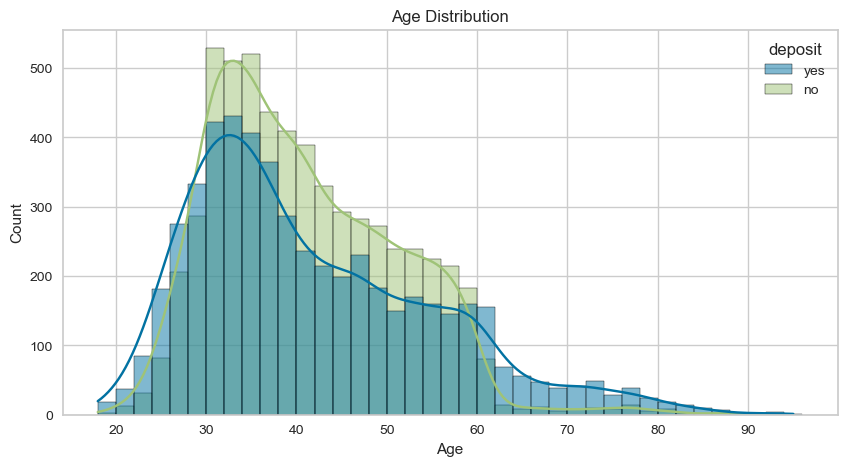

In [7]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="age",hue="deposit", binwidth=2, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")

Text(0.5, 0, 'Job')

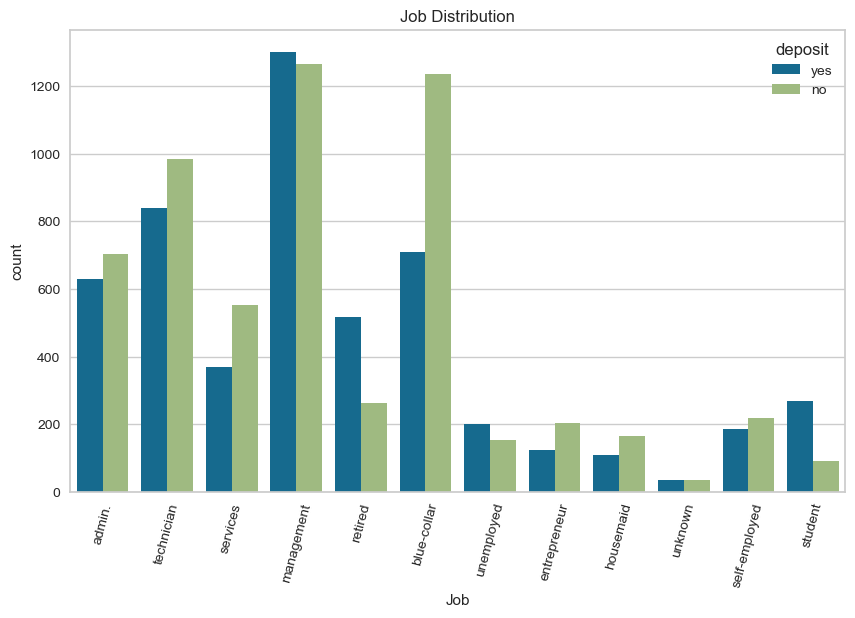

In [8]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="job",hue="deposit")
plt.xticks(rotation=75)
plt.title("Job Distribution")
plt.xlabel("Job")

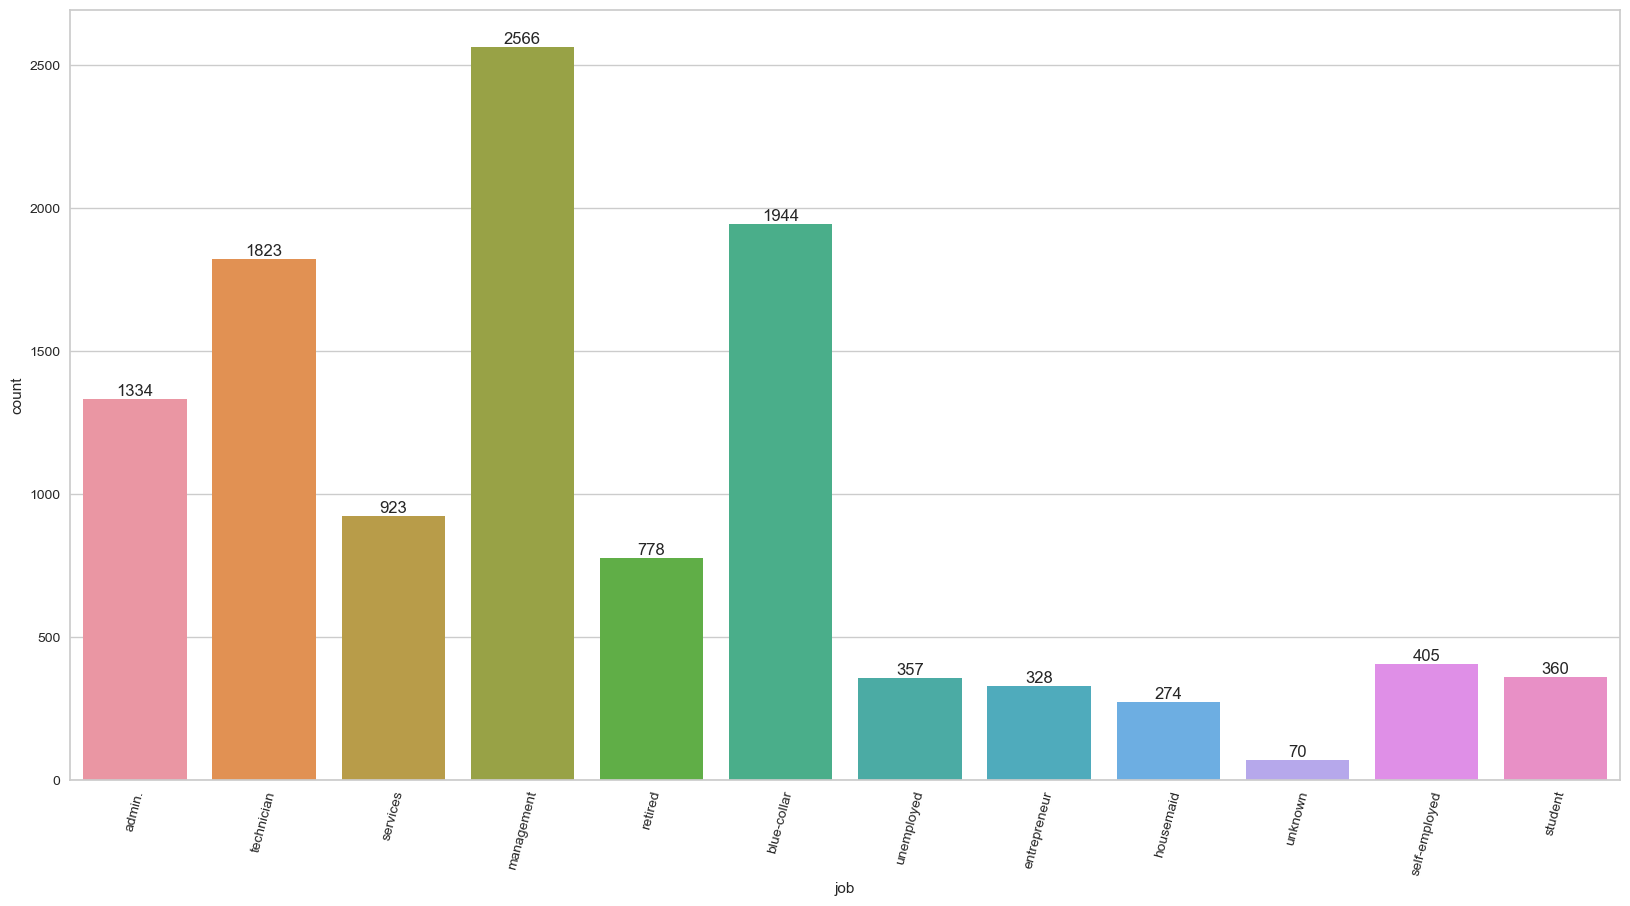

In [9]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x = df["job"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

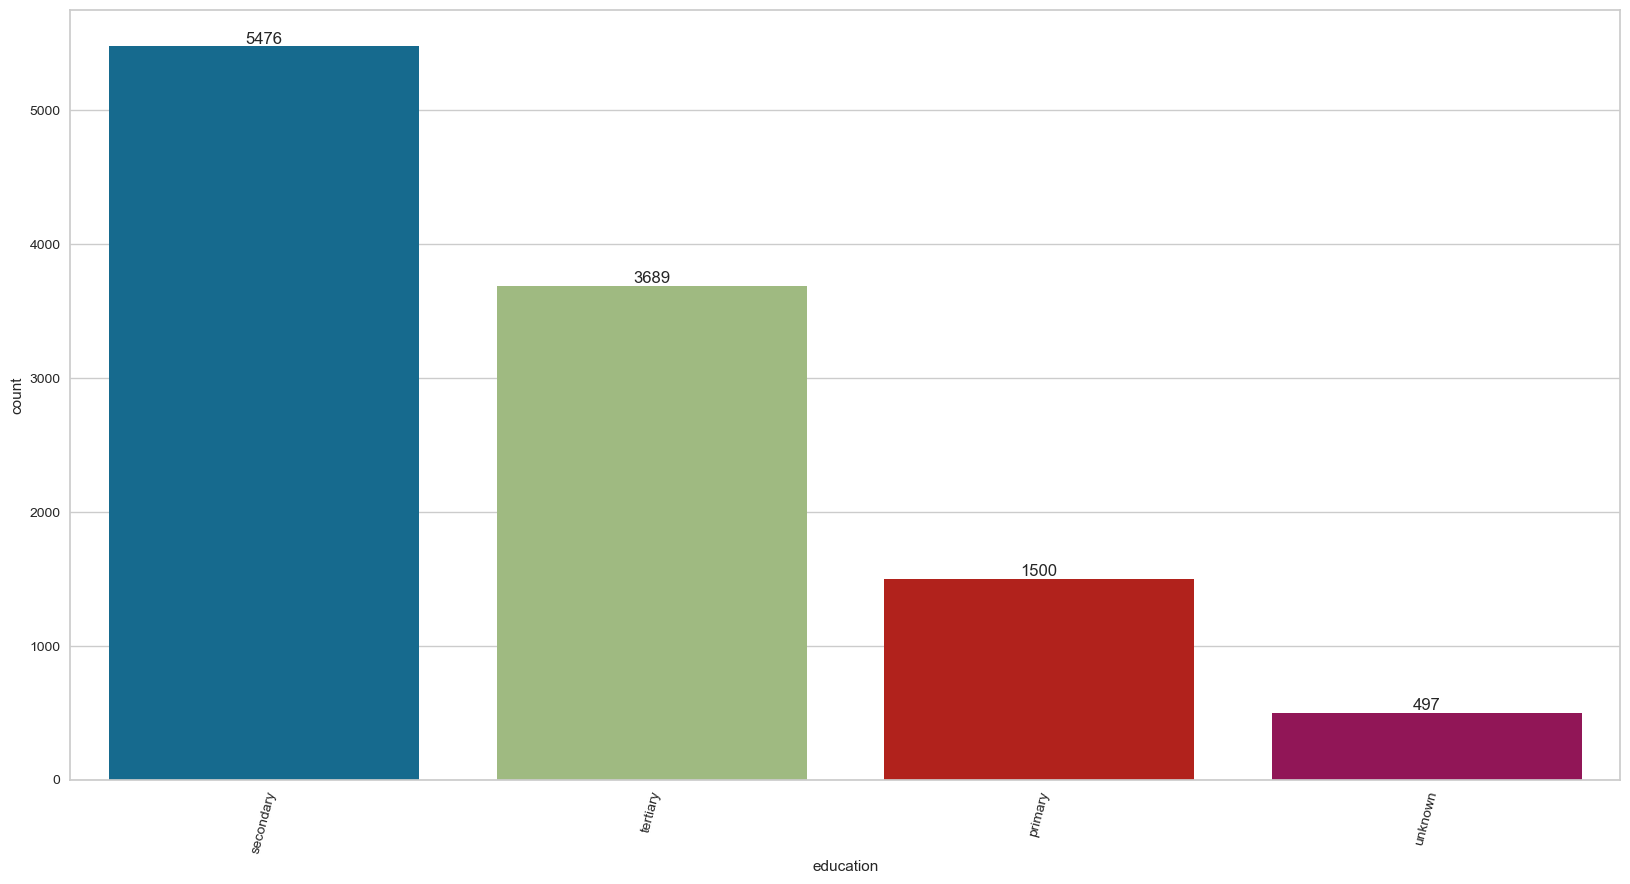

In [10]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x = df["education"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

Text(0.5, 0, 'Age')

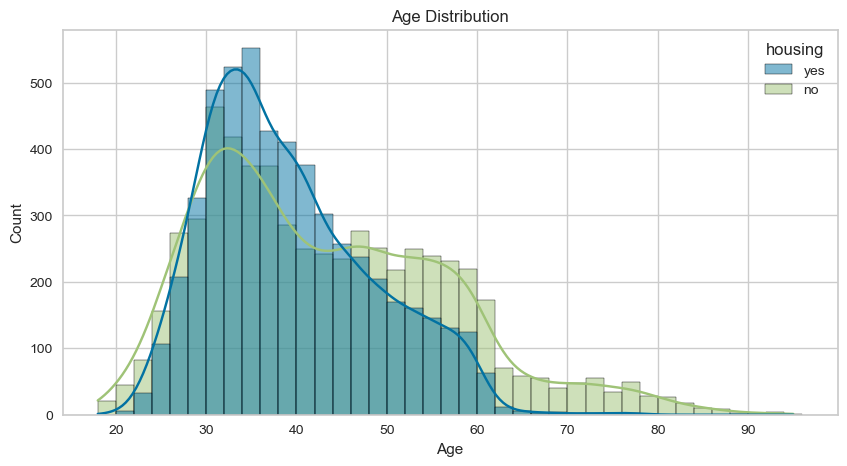

In [11]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="age",hue="housing", binwidth=2, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")

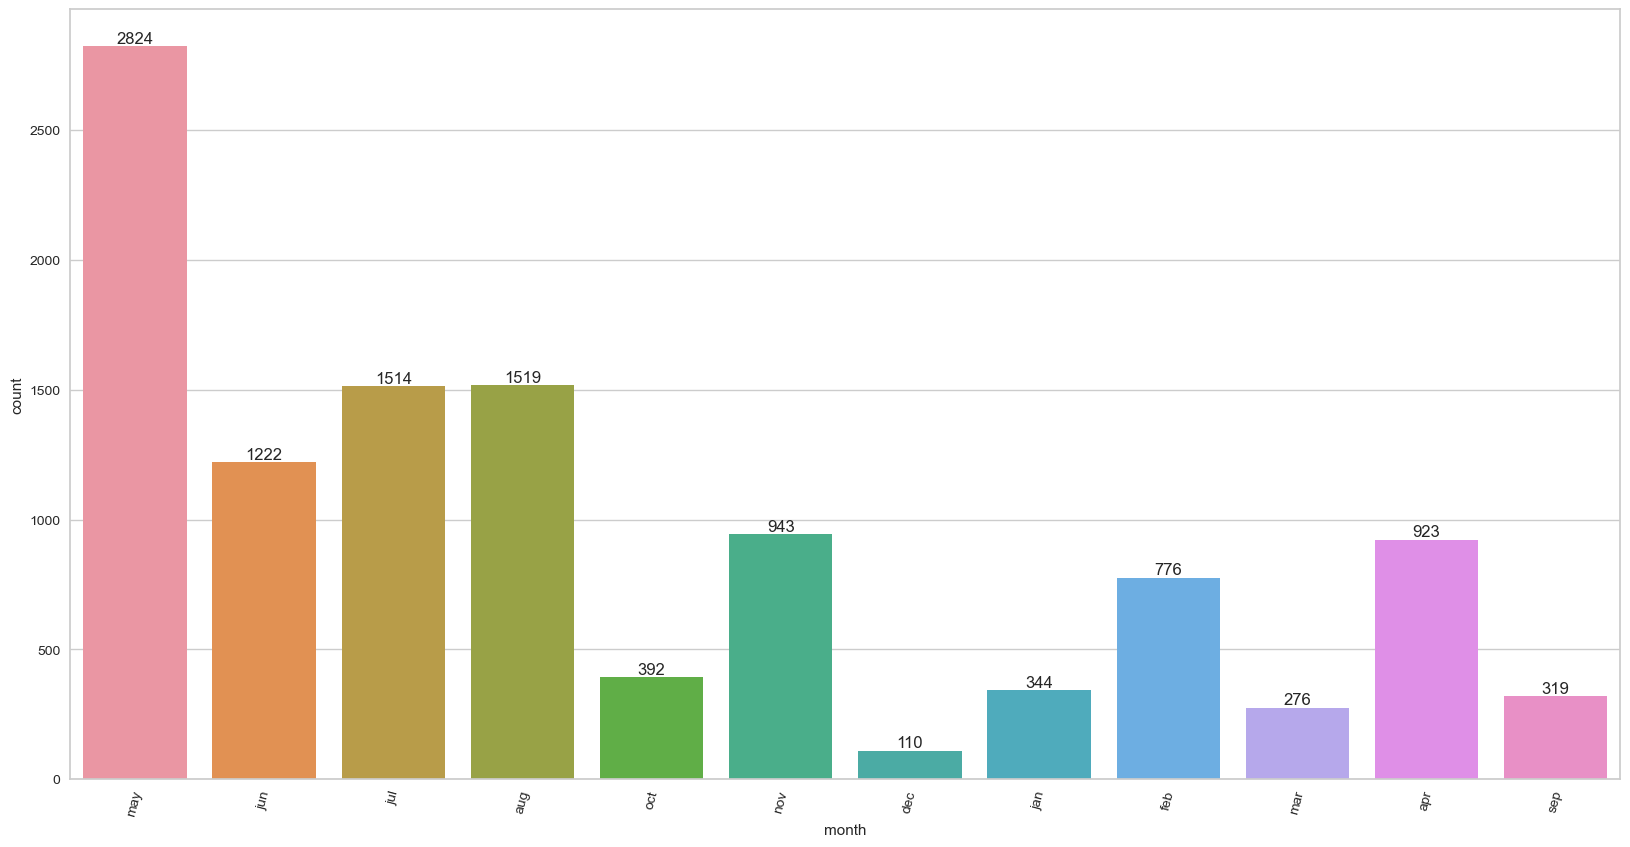

In [12]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x = df["month"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

Text(0.5, 0, 'Month')

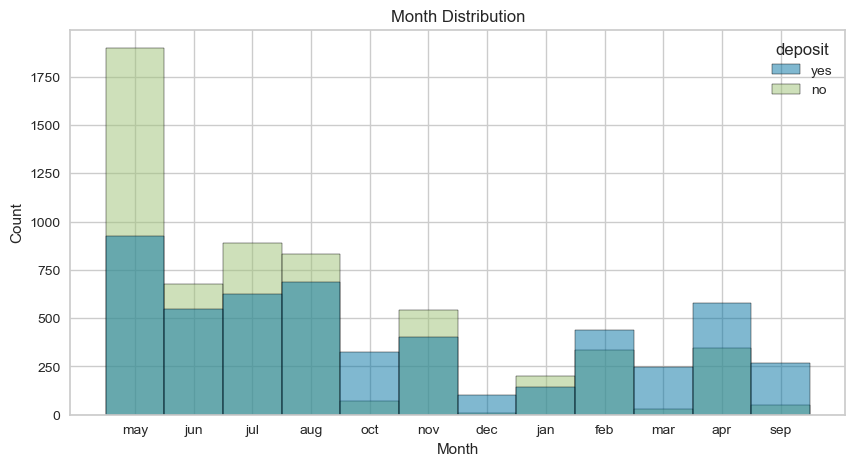

In [13]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="month",hue="deposit", binwidth=6)

plt.title("Month Distribution")
plt.xlabel("Month")

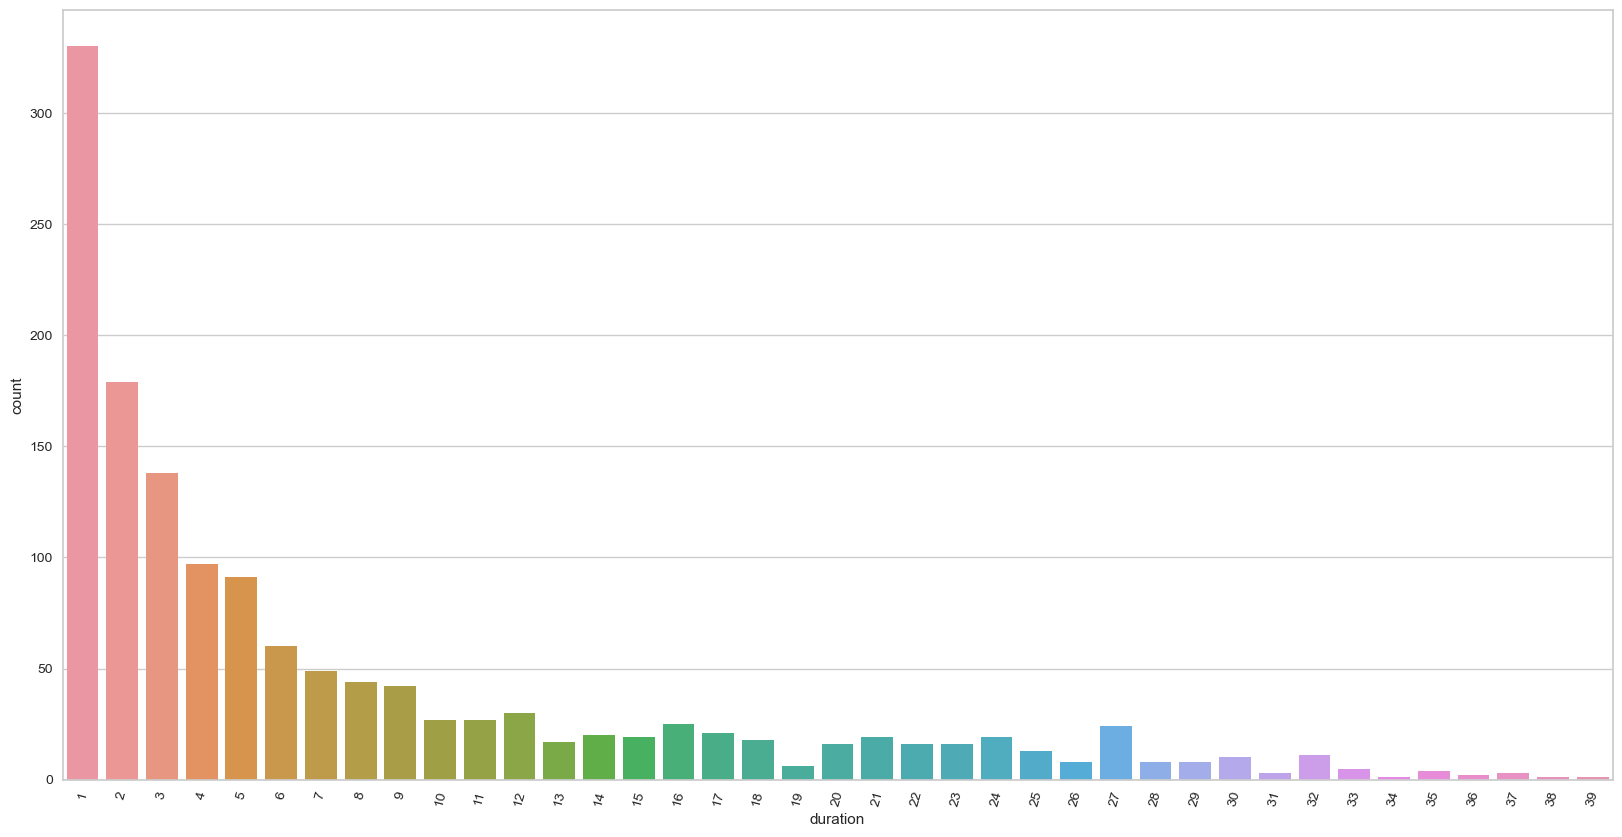

In [14]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x = df["duration"].value_counts())

plt.xticks(rotation=75)

plt.show()

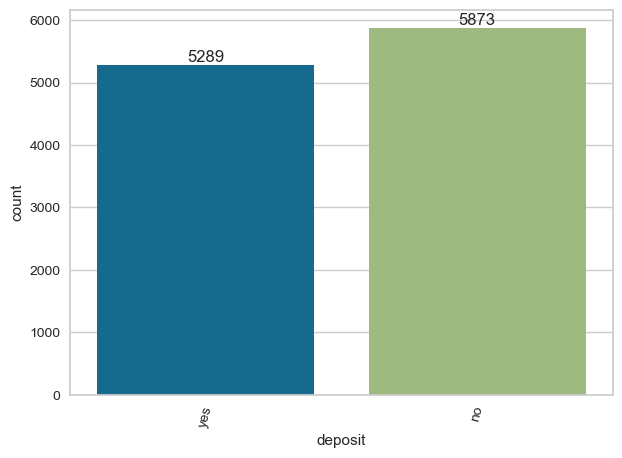

In [15]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["deposit"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

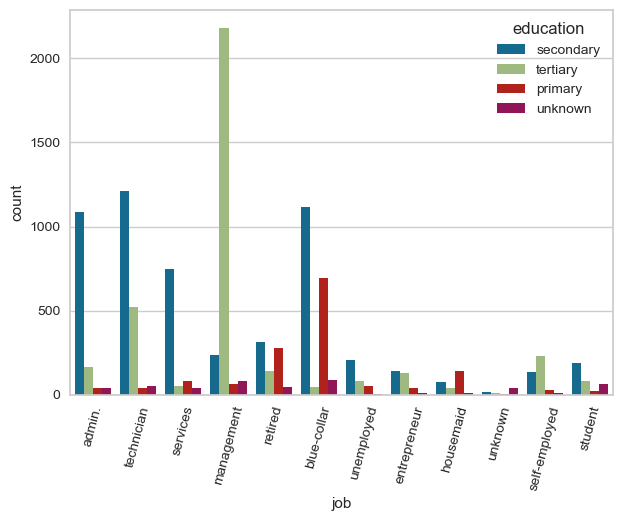

In [16]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["job"],hue=df["education"])

plt.xticks(rotation=75)


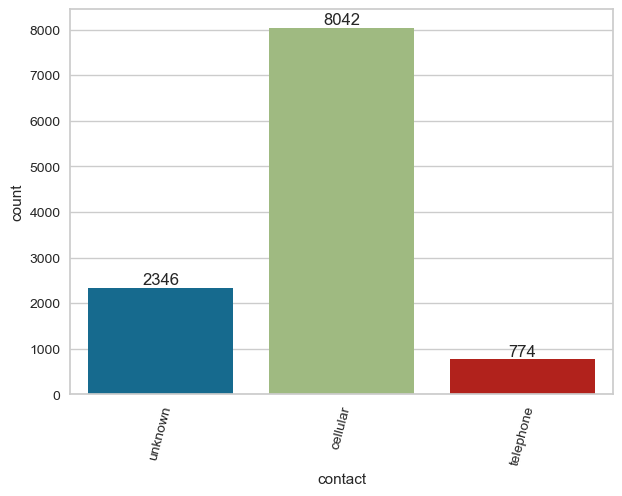

In [17]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["contact"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

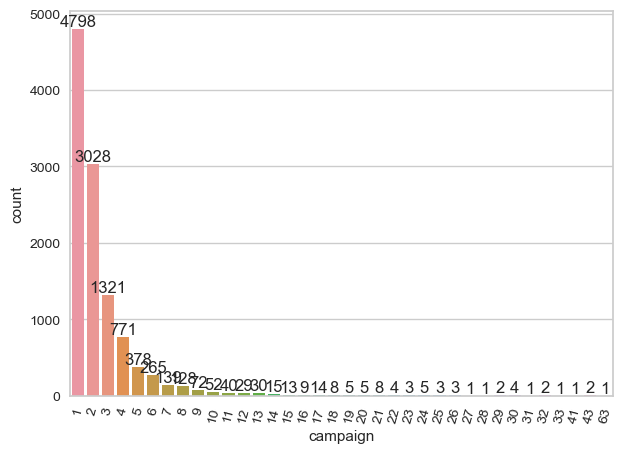

In [18]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["campaign"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

Text(0.5, 0, 'Campaign')

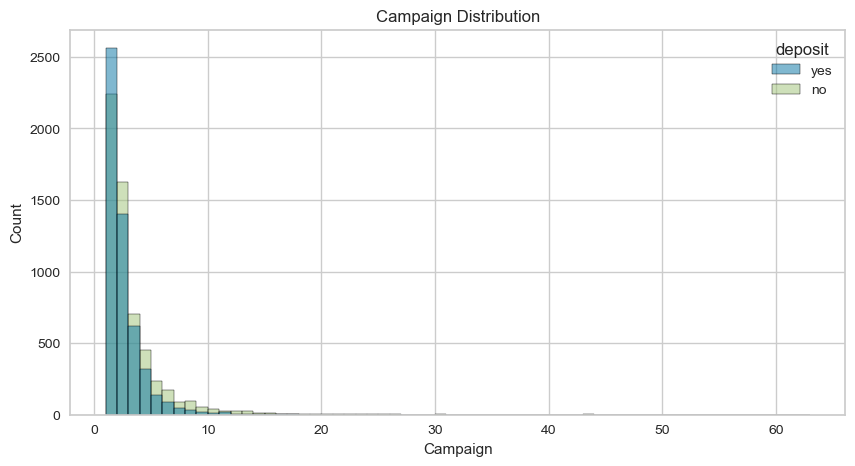

In [19]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="campaign",hue="deposit", binwidth=1)

plt.title("Campaign Distribution")
plt.xlabel("Campaign")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='balance', ylabel='job'>

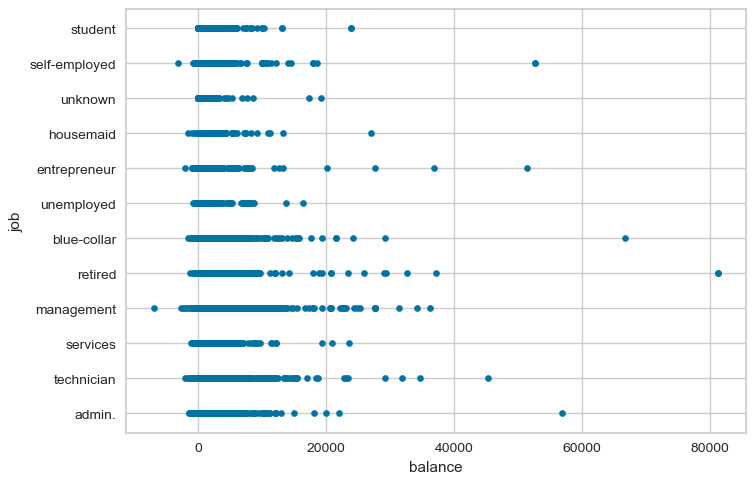

In [20]:
df.plot.scatter(x="balance",y="job")

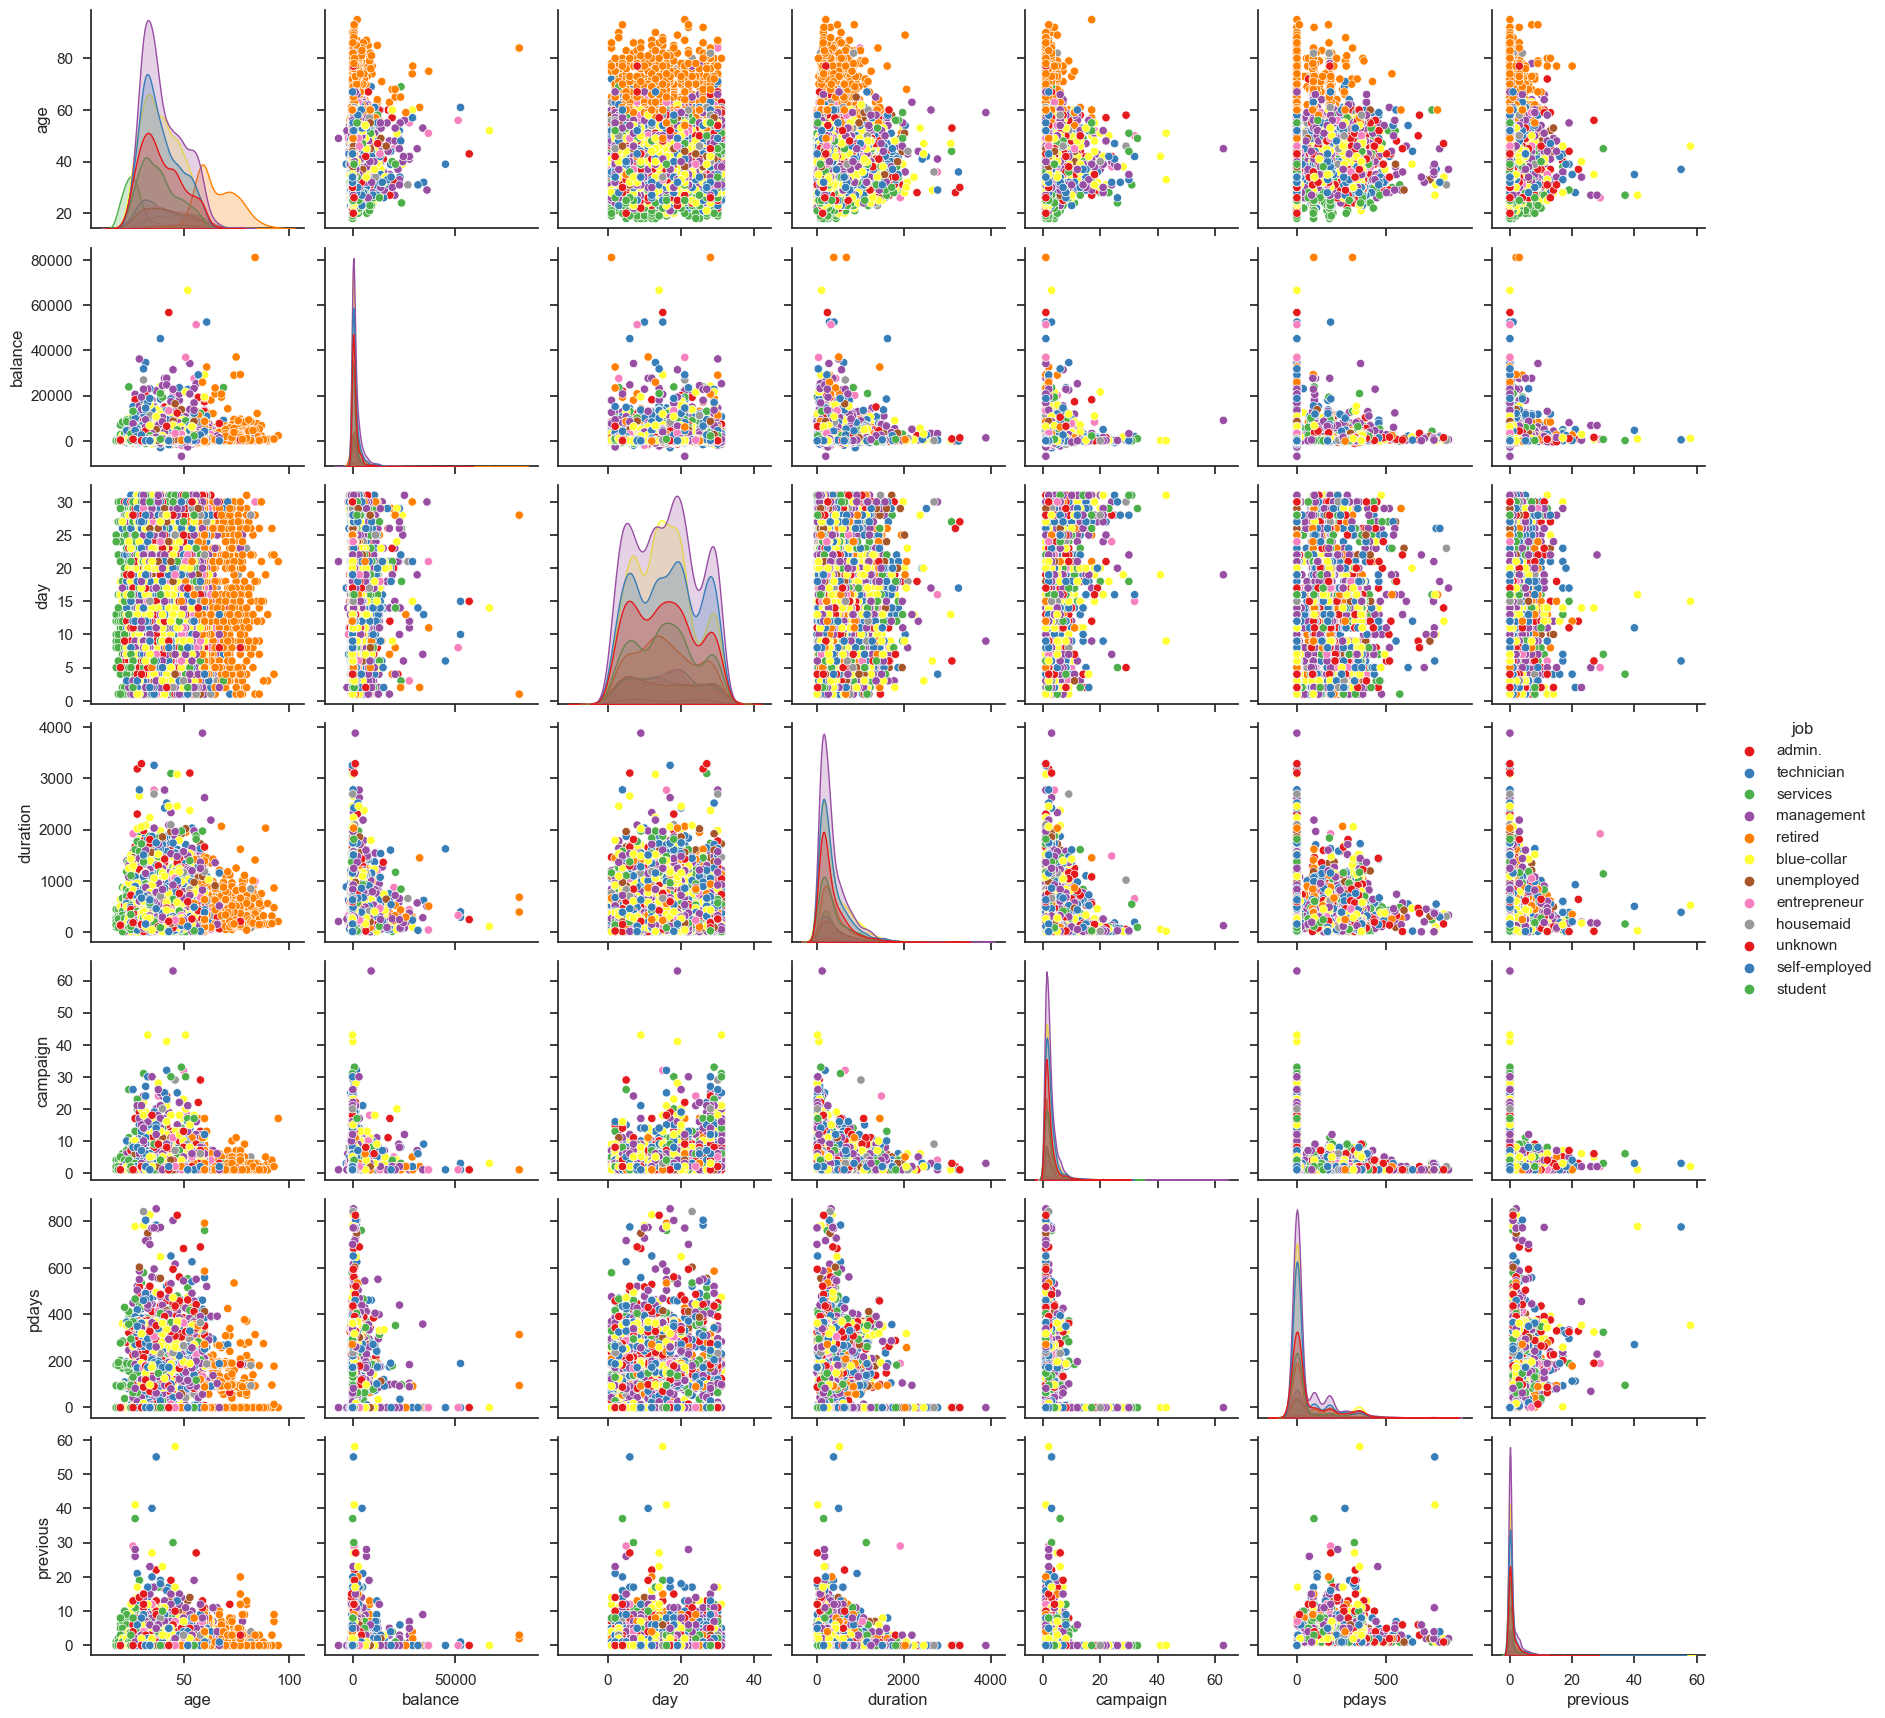

In [21]:
sns.set(style="ticks")
sns.pairplot(df,hue="job",palette="Set1")

plt.show()

In [22]:
df.replace("unknown",np.NaN, inplace=True)

In [23]:
df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

## <font color="purple">Feature Engineering and Preparing the Data for Machine Learning

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [25]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3140,37,admin.,single,secondary,no,728,no,no,cellular,3,feb,129,1,174,2,other,yes
9505,30,management,single,secondary,no,135,no,no,cellular,14,aug,112,2,-1,0,NaN,no
161,34,management,single,tertiary,no,1058,yes,no,NaN,28,may,864,2,-1,0,NaN,yes


In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


### job and education

In [27]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', nan,
       'self-employed', 'student'], dtype=object)

In [28]:
df["job"].fillna(df["job"].mode()[0],inplace=True)

In [29]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'self-employed', 'student'], dtype=object)

In [30]:
df["education"].fillna(df["education"].mode()[0],inplace=True)

### default

In [31]:
df["default"]=df["default"].replace({"yes":1,"no":0})

In [32]:
df["default"].value_counts()

0    10994
1      168
Name: default, dtype: int64

### housing

In [33]:
df["housing"]=df["housing"].replace({"yes":1,"no":0})

In [34]:
df["housing"].value_counts()

0    5881
1    5281
Name: housing, dtype: int64

In [35]:
def yes_num(df,col):
    df[col]=df[col].replace({"yes":1,"no":0})
    
    

### loan

In [36]:
yes_num(df,"loan")

In [37]:
df["loan"].value_counts()

0    9702
1    1460
Name: loan, dtype: int64

### deposit

In [38]:
yes_num(df,"deposit")

In [39]:
df["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

### contact

In [40]:
df["contact"].fillna(df["contact"].mode()[0],inplace=True)

### poutcome

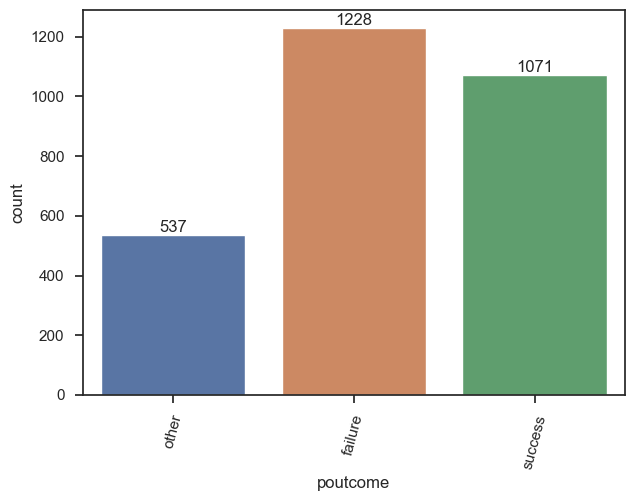

In [41]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["poutcome"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

In [42]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [43]:
df["poutcome"]=df["poutcome"].fillna("ongoing")

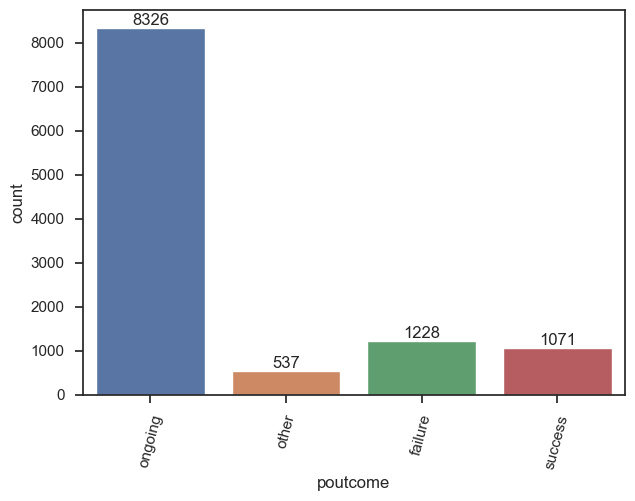

In [44]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = df["poutcome"])

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0])
plt.show()

In [45]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6964,27,admin.,single,secondary,0,292,1,0,cellular,12,may,53,9,362,8,other,0


In [46]:
abs(df.corr()["deposit"].sort_values(ascending=False))

deposit     1.000000
duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034901
default     0.040680
day         0.056326
loan        0.110580
campaign    0.128081
housing     0.203888
Name: deposit, dtype: float64

#### pdays

In [47]:
df["pdays"].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [48]:
df["pdays"]=df["pdays"].replace({-1:0})

## <font color="purple"> Preparing the Data for Model

<AxesSubplot:>

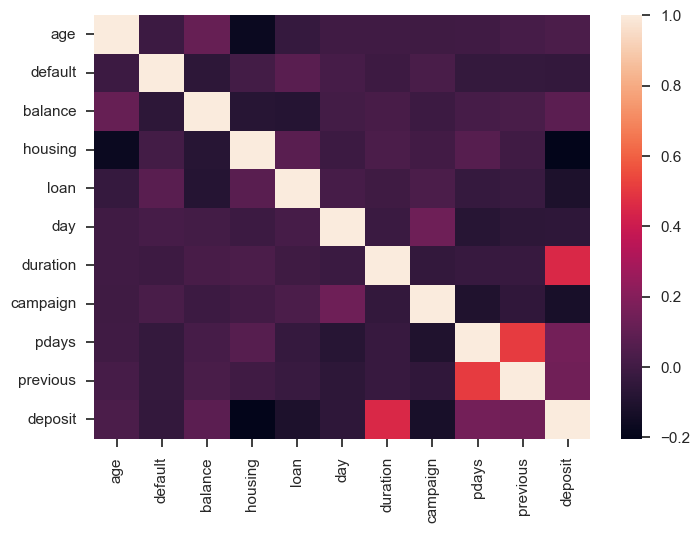

In [49]:
sns.heatmap(df.corr())

In [50]:
abs(df.corr()["deposit"].sort_values(ascending=False))

deposit     1.000000
duration    0.451919
pdays       0.151167
previous    0.139867
balance     0.081129
age         0.034901
default     0.040680
day         0.056326
loan        0.110580
campaign    0.128081
housing     0.203888
Name: deposit, dtype: float64

In [51]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [52]:
x=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y=df['deposit']

In [53]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,0,2343,1,0,cellular,5,1042,1,0,0,ongoing
1,56,admin.,married,secondary,0,45,0,0,cellular,5,1467,1,0,0,ongoing
2,41,technician,married,secondary,0,1270,1,0,cellular,5,1389,1,0,0,ongoing
3,55,services,married,secondary,0,2476,1,0,cellular,5,579,1,0,0,ongoing
4,54,admin.,married,tertiary,0,184,0,0,cellular,5,673,2,0,0,ongoing


In [54]:
x=pd.get_dummies(x,columns=['job', 'marital', 'education','contact','poutcome'],drop_first=True)

# <font color="blue"> Classification Model

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score

import xgboost as xgb


In [56]:
def algo_test (x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    d=DecisionTreeClassifier()
    gb=GradientBoostingClassifier()
    rgc= RandomForestClassifier()
    xgb1= xgb.XGBClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
    
    algos= [g,b,k,d,gb,rgc,xgb1]
    algo_names = ["GaussianNB","BernoulliNB","KNeighborsClassifier","DecisionTreeClassifier",
                 "GradientBoostingClassifier","RandomForestClassifier","Xgboost"]
                
    accuracy= []
    confusion = []
    fone=[]
    
    result = pd.DataFrame(columns=["Accuracy","Confusion","F1"],index = algo_names)
    
    for algo in algos:
        algo.fit(x_train,y_train)
        accuracy.append(accuracy_score(y_test,algo.predict(x_test)))
        confusion.append(confusion_matrix(y_test,algo.predict(x_test)))
        fone.append(f1_score(y_test, algo.predict(x_test)))
       
    
     
        
    result.Accuracy = accuracy
    result.Confusion = confusion
    result.F1 = fone
   
    
    return result.sort_values("Accuracy", ascending=False)

In [57]:
algo_test(x,y)

,Accuracy,Confusion,F1
RandomForestClassifier,0.809225,"[[932, 234], [192, 875]]",0.804228
Xgboost,0.806090,"[[932, 234], [199, 868]]",0.800369
GradientBoostingClassifier,0.800269,"[[925, 241], [205, 862]]",0.794470
KNeighborsClassifier,0.747873,"[[897, 269], [294, 773]]",0.733049
DecisionTreeClassifier,0.734886,"[[883, 283], [309, 758]]",0.719165
GaussianNB,0.731303,"[[958, 208], [392, 675]]",0.692308
BernoulliNB,0.649798,"[[929, 237], [545, 522]]",0.571742


In [58]:
x=df[[ 'job', 'marital', 'education', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
x=pd.get_dummies(x,columns=['job', 'marital', 'education','contact','poutcome'],drop_first=True)

In [59]:
algo_test(x,y)

,Accuracy,Confusion,F1
GradientBoostingClassifier,0.794447,"[[913, 253], [206, 861]]",0.789546
Xgboost,0.794447,"[[911, 255], [204, 863]]",0.789931
RandomForestClassifier,0.767577,"[[891, 275], [244, 823]]",0.760277
KNeighborsClassifier,0.754142,"[[889, 277], [272, 795]]",0.743338
DecisionTreeClassifier,0.736229,"[[873, 293], [296, 771]]",0.723604
GaussianNB,0.724586,"[[965, 201], [414, 653]]",0.679854
BernoulliNB,0.648007,"[[927, 239], [547, 520]]",0.569551


In [60]:
x=df[[ 'job', 'marital', 'education', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous']]
x=pd.get_dummies(x,columns=['job', 'marital', 'education','contact'],drop_first=True)

In [61]:
algo_test(x,y)

,Accuracy,Confusion,F1
GradientBoostingClassifier,0.793999,"[[906, 260], [200, 867]]",0.790337
Xgboost,0.779669,"[[892, 274], [218, 849]]",0.775342
RandomForestClassifier,0.770264,"[[888, 278], [235, 832]]",0.764355
KNeighborsClassifier,0.755038,"[[889, 277], [270, 797]]",0.744512
DecisionTreeClassifier,0.737125,"[[862, 304], [283, 784]]",0.727610
GaussianNB,0.728616,"[[923, 243], [363, 704]]",0.699106
BernoulliNB,0.652933,"[[830, 336], [439, 628]]",0.618415


# <font color="red"> Bank Customer Segmentation

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering #it separates data into clusters using the hierarchical clustering solution
from yellowbrick.cluster import KElbowVisualizer #a visualization tool used to determine the optimal number of clusters in a clustering algorithm


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,cellular,5,may,1042,1,0,0,ongoing,1
1,56,admin.,married,secondary,0,45,0,0,cellular,5,may,1467,1,0,0,ongoing,1
2,41,technician,married,secondary,0,1270,1,0,cellular,5,may,1389,1,0,0,ongoing,1
3,55,services,married,secondary,0,2476,1,0,cellular,5,may,579,1,0,0,ongoing,1
4,54,admin.,married,tertiary,0,184,0,0,cellular,5,may,673,2,0,0,ongoing,1


In [65]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [66]:
seg=df[['age', 'job', 'marital', 'education','balance']]

In [67]:
seg.head()

,age,job,marital,education,balance
0,59,admin.,married,secondary,2343
1,56,admin.,married,secondary,45
2,41,technician,married,secondary,1270
3,55,services,married,secondary,2476
4,54,admin.,married,tertiary,184


In [68]:
seg=seg[seg["balance"]>0]

In [69]:
seg.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9700.0,41.255464,12.129780,18.0,32.0,39.0,49.00,95.0
balance,9700.0,1781.889278,3386.006718,1.0,258.0,730.0,2021.25,81204.0


In [70]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9700 entries, 0 to 11159
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9700 non-null   int64 
 1   job        9700 non-null   object
 2   marital    9700 non-null   object
 3   education  9700 non-null   object
 4   balance    9700 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 454.7+ KB


* the **"+="** operator adds another value to the current value of a variable. For example, the expression "a += b" updates variable "a" by adding the value of the variable "b" the value of variable "a"

In [71]:
a=5
b=3
a+=b

print(a)

8


In [72]:
cont_features = [] #for continuous variable
cat_features = [] #for categrical variable

for i in seg.columns:
    if seg[i].dtype == "int64":
        cont_features += [i]
        
    else:
        cat_features += [i]

In [73]:
cont_features

['age', 'balance']

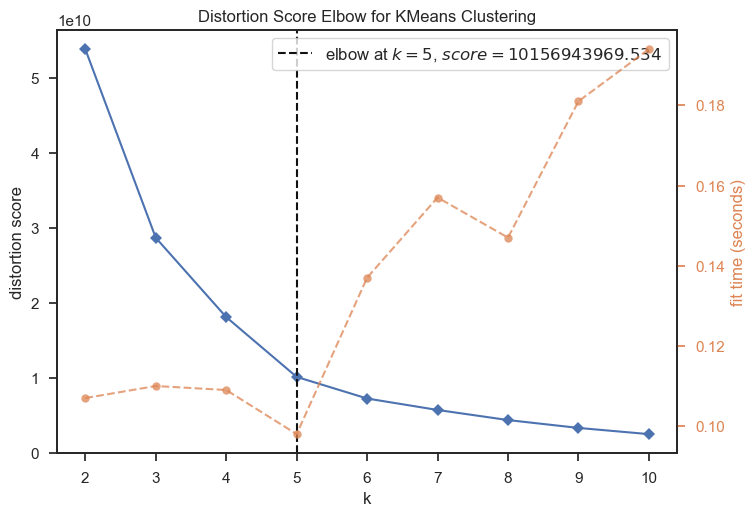

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
elbow = KElbowVisualizer(KMeans(),k=10)
elbow.fit(seg[cont_features])
elbow.show()

* **n_clusters** is the number of clusters to be created

* **init** is a strategy taht specifies how to make initial estimates of cluster centers

* **random_state=0** argument is a random insertion that makes clustering repeatable

* **n_init** is the number of clustering trials with different centers. The one with the best result is selected

* **max_iter**, determines the maximum number of times centers are updated in an iteration


###### init = "k-means++": cluster centers are chosen to obtain better starting points that points in the dataset. This method is the default method of the KMeans algorithm

some of the most commonly used methods are:
* **random**: cluster centers are chosen from random points in the dataset

* **ndarray**: cluster centers are specified as an array

* **callable**: cluster centers are calculated by a function

###### why we used k-means++
* It provides a better starting point than the random selection of cluster centers and can help the KMeans algorithm to yield better results. In particular, the greater the difference in distance between points in the dataset, the greater the success of the k-means++ method

In [75]:
kmeans = KMeans(n_clusters = 5,
                init = "k-means++",
                random_state = 0,
                n_init = 30,
               max_iter = 100)

In [76]:
clusters = kmeans.fit_predict(seg[cont_features])

In [77]:
seg["cluster"] = clusters

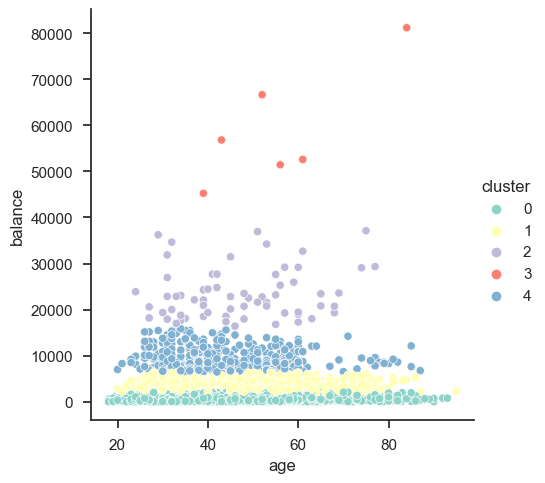

In [78]:
sns.relplot(x = "age",y = "balance",hue = "cluster",data = seg, palette="Set3")

In [79]:
#round() : specifies how many digits the given number is rounded to after the decimal point. By default, this function rounds the given number to the nearest integer

In [80]:
groups = seg.groupby(["cluster"]).agg(["min","max","median","mean","sum","count"]).round()

In [81]:
groups["total"] = (groups["balance"]["sum"]/groups["balance"]["sum"].sum()).round(3)*100

In [82]:
groups

age                                balance                           \
        min max median  mean     sum count     min    max   median     mean   
cluster                                                                       
0        18  93   38.0  40.0  295681  7335       1   2074    458.0    622.0   
1        20  95   42.0  44.0   81604  1850    2077   6403   3286.0   3530.0   
2        24  77   45.0  46.0    3266    71   16397  37127  22520.0  23326.0   
3        39  84   58.0  60.0     480     8   45248  81204  54709.0  60969.0   
4        20  87   42.0  44.0   19147   436    6422  15841   8596.0   9285.0   

                       total  
             sum count        
cluster                       
0        4562246  7335  26.4  
1        6529899  1850  37.8  
2        1656115    71   9.6  
3         487753     8   2.8  
4        4048313   436  23.4

In [83]:
groups_ = seg.groupby(["cluster","job","marital","education"]).agg(["median","sum","count"]).round()

In [84]:
groups_["total"] = (groups_["balance"]["sum"]/groups["balance"]["sum"].sum()).round(3)*100

* **round(3)*100**: it aims to express the result of the expression as a percentage by multiplyin the result by 100 and rounding the result to 3 decimal places

* **groups_["balance"]["sum"]** statement groups the "balance" column in the groups_dataframe and calculates the sum of each group. Then the aggregation ratio of this sum over all data is calculated

* **groups["balance"]["sum"].sum()** returns the sum of all rows of the groups_["balance"]["sum"] column.

Thus, for each cluster, the expression (groups_["balance"]["sum"]/groups_["balance"]["sum"].sum()) gives the ratio of the total account balance of that cluster to the sum of all account balances.

In [85]:
top = groups_.sort_values(by="total",ascending=False)

In [86]:
top.head(50)

age               balance          \
                                         median    sum count   median     sum   
cluster job           marital  education                                        
1       management    married  tertiary    43.0   9188   207   3371.0  732557   
4       management    single   tertiary    32.0   1808    53   8669.0  494426   
                      married  tertiary    46.0   2543    56   8096.0  492329   
1       management    single   tertiary    32.0   4453   134   3312.0  480743   
2       management    married  tertiary    44.0    848    19  23189.0  463768   
0       management    married  tertiary    39.0  29539   714    474.0  456728   
1       blue-collar   married  secondary   41.0   4431   106   3122.0  375937   
0       blue-collar   married  secondary   40.0  22590   560    540.0  378647   
4       technician    married  secondary   44.0   1725    38   9182.0  364413   
1       technician    married  secondary   43.0   4382   102   3286.0  348127   
0       management    single   tertiary    32.0  17237   514    524.0  343468   
1       blue-collar   married  primary     46.0   3947    87   3485.0  316030   
0       admin.        married  secondary   40.0  16338   396    489.0  252992   
1       admin.        married  secondary   48.0   3518    74   3578.0  263746   
0       technician    married  secondary   40.0  17822   425    465.0  259500   
1       retired       married  secondary   64.0   4465    68   3326.0  247061   
        services      married  secondary   39.0   2579    63   3413.0  226333   
        management    married  secondary   52.0   3365    67   2895.0  222067   
        technician    single   secondary   32.0   1823    55   3466.0  205164   
0       technician    single   secondary   32.0  10597   318    434.0  190182   
4       admin.        married  secondary   43.0    864    20   8782.0  188794   
1       management    divorced tertiary    45.0   2585    55   3261.0  198619   
        retired       married  primary     71.0   3813    55   3324.0  192278   
0       services      married  secondary   38.0  11610   295    431.0  181344   
1       admin.        single   secondary   38.0   2026    51   3160.0  170455   
        technician    single   tertiary    32.0   1588    49   3291.0  176634   
4       blue-collar   married  secondary   45.0    731    17   9328.0  166721   
0       blue-collar   married  primary     42.0  13880   324    393.0  173720   
4       technician    single   tertiary    30.0    500    16  11862.0  179578   
1       blue-collar   single   secondary   31.0   1284    41   3430.0  148706   
0       admin.        single   secondary   32.0   9523   281    410.0  155510   
2       retired       married  secondary   65.0    448     7  20723.0  147197   
3       retired       married  secondary   84.0    168     2  81204.0  162408   
4       retired       married  primary     63.0    989    15   9367.0  139966   
        technician    single   secondary   36.0    527    14   9388.0  130276   
        blue-collar   married  primary     45.0    683    15   7934.0  133551   
2       management    single   tertiary    30.0    185     6  20585.0  137016   
1       technician    married  tertiary    37.0   1509    38   3286.0  133800   
0       retired       married  secondary   62.0  10997   171    613.0  138452   
4       management    divorced tertiary    54.0    648    13   9326.0  128711   
0       student       single   secondary   25.0   4952   195    382.0  113710   
4       technician    married  tertiary    39.0    531    13   8023.0  117599   
1       student       single   secondary   26.0    972    37   3090.0  128489   
0       services      single   secondary   30.0   6218   198    363.0  113926   
1       retired       married  tertiary    66.0   2517    38   2908.0  128450   
4       retired       married  secondary   70.0   1017    15   8304.0  123911   
0       blue-collar   single   secondary   30.0   7267   231    423.0  1270